In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from umap import UMAP

In [2]:
df = pd.read_csv('main.tsv', sep='\t', header=0)

In [3]:
df

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,..."
1,002ba2a7c74dbffc32e4568af230d49a,25b8ebecb15b8f3edb5eed36a1f699b4,2021-06-23T03:39:00.000Z,1,1,0,50,2021-09-10,2021-09-14,2,0,0,1,PRICE ASCENDING,NaN,"1,5151135,0,null,null,null,1,1,1,0,0"
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759..."
3,00d5e2bca7962f67d5695e7e7b92feb8,d3b41f5d906b3f5e56bcafd4a7428634,2021-07-16T01:08:00.000Z,12,1,0,13,2021-08-25,2021-08-28,2,0,0,1,RECOMMENDED,NaN,"1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059..."
4,013f92616fe583c4ba0c3919b69cf3d9,a359fd984e5ae5be64af5226dd1e9fe2,2021-07-07T20:49:00.000Z,1,1,0,206,2021-08-30,2021-09-04,1,0,0,1,RECOMMENDED,VIPONLY:FALSE,"1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577804,ffde5a54ea8f3b225f5ed82801bc8e04,f4ab1530a53c82976072dec5c80ee30f,2021-06-18T19:23:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,..."
2577805,ffde5a54ea8f3b225f5ed82801bc8e04,7defa5f7f28e8a42b970c7867a7fbab7,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,PRICE:1,"1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,..."
2577806,ffde5a54ea8f3b225f5ed82801bc8e04,0e2ffe5983f425ee8edeaa5c431e5e90,2021-06-18T19:24:00.000Z,1,1,1,85,2021-07-01,2021-07-04,2,0,0,1,RECOMMENDED,NaN,"1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,..."
2577807,ffdfca5abb43a1931980abac7101aa59,ab879b951d96cb973417b3c76a83f764,2021-07-14T23:21:00.000Z,21,33,0,8249,2021-09-14,2021-09-18,2,0,0,1,PRICE ASCENDING,NaN,"1,5233550,0,null,null,null,1,1,1,0,0"


In [4]:
df['impressions']

0          1,5695234,1,4.0,250.0,2.0,1,0,3,0,0|2,1734546,...
1                       1,5151135,0,null,null,null,1,1,1,0,0
2          1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0|2,5170759...
3          1,2391667,1,4.0,1625.0,5.0,0,0,5,0,0|2,4930059...
4          1,6714720,1,5.0,225.0,3.0,1,0,5,0,0|2,5593294,...
                                 ...                        
2577804    1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...
2577805    1,5828015,0,3.0,650.0,2.0,1,0,2,0,0|2,1111866,...
2577806    1,379138,0,5.0,1325.0,4.0,1,1,2,0,0|2,2139996,...
2577807                 1,5233550,0,null,null,null,1,1,1,0,0
2577808    1,4018051,1,5.0,1025.0,5.0,1,1,5,0,0|2,2589402...
Name: impressions, Length: 2577809, dtype: object

In [5]:
def func(x):
    b = []
    x = x.split('|')
    for i in x:
        if i[-3:] != '0,0':
            b.append(i)
    if len(b) == 0:
        b = 0
    return b

In [6]:
df['impressions'] = df['impressions'].apply(func)

In [7]:
df['impressions'][0]

['7,2722643,0,4.0,75.0,3.0,1,1,2,1,0',
 '9,1197530,0,4.0,250.0,3.0,1,0,2,1,0',
 '12,4869920,0,4.0,225.0,3.0,1,0,1,4,0']

In [8]:
df = df[df['impressions']!=0]

In [9]:
df

,user_id,search_id,search_timestamp,point_of_sale,geo_location_country,is_mobile,destination_id,checkin_date,checkout_date,adult_count,child_count,infant_count,room_count,sort_type,applied_filters,impressions
0,001bbff3030c95740d4c55bb72e823e9,541933a931216d270f53277c2de068d0,2021-07-02T19:38:00.000Z,2,1,0,898,2021-07-04,2021-07-05,2,0,0,1,RECOMMENDED,NaN,"[7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530..."
2,00c5152ed6ef5b937e8320a260bde084,349c86ff1be41553878e01988ca209d1,2021-06-10T00:08:00.000Z,1,1,0,49,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"[1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]"
10,016f433e1e98146912a7c2600c2ad3f0,dd28cd5c25b00996843611ae6ba35bcf,2021-06-25T05:54:00.000Z,1,1,1,14674,2021-07-25,2021-07-26,2,0,0,1,RECOMMENDED,NaN,"[1,1417933,0,4.0,200.0,3.0,1,0,1,2,0]"
15,01a367de6a4a099fbd380ad28f9314aa,b4e228f666b1095fad952bdb63d721c4,2021-06-10T22:04:00.000Z,1,1,0,719,2021-08-02,2021-08-04,2,0,0,1,RECOMMENDED,NaN,"[1,4291709,0,4.0,1025.0,3.0,1,0,5,1,0]"
19,028382cf0696909da6c5bc201a4a2027,41d37cd2954e3840d5c3c46f00aa8f95,2021-06-04T09:01:00.000Z,1,128,0,23358,2021-06-18,2021-06-19,2,0,0,1,RECOMMENDED,NaN,"[1,1767157,0,4.0,25.0,5.0,1,1,4,2,0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2577779,feca99cc15cdc1104816a55e76b73a8b,b6facfbba80560baf628a6cad75651eb,2021-06-25T21:34:00.000Z,3,2,1,2961,2021-06-27,2021-06-28,2,0,0,1,RECOMMENDED,NaN,"[5,5081655,0,4.0,600.0,3.0,1,1,3,1,0]"
2577780,feca99cc15cdc1104816a55e76b73a8b,fa738744a5cb4b196801c662966fce61,2021-06-25T22:41:00.000Z,3,2,1,2961,2021-07-09,2021-07-10,2,0,0,1,RECOMMENDED,NaN,"[13,1771106,0,3.0,1025.0,2.0,0,1,1,1,0]"
2577795,fef65427171b72e647359b4bd1dabc7d,4047073cbb57caa5f47220bd4d1b030f,2021-06-08T02:25:00.000Z,1,1,1,5658,2021-07-07,2021-07-12,2,0,0,1,RECOMMENDED,NaN,"[3,525177,0,4.0,25.0,null,1,0,2,1,0]"
2577801,ffaa2dc7ded51307a3f1ec1f73659bad,2825998239f3da79b129242d3a8674e7,2021-07-27T19:54:00.000Z,1,1,1,24066,2021-07-30,2021-07-31,2,0,0,1,RECOMMENDED,NaN,"[6,3575440,0,4.0,450.0,3.0,1,0,2,1,0]"


In [10]:
df = df.reset_index()


In [11]:
df.drop('index', inplace=True, axis=1)

In [12]:
hotels = df['impressions']

In [13]:
hotels

0         [7,2722643,0,4.0,75.0,3.0,1,1,2,1,0, 9,1197530...
1                    [1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0]
2                     [1,1417933,0,4.0,200.0,3.0,1,0,1,2,0]
3                    [1,4291709,0,4.0,1025.0,3.0,1,0,5,1,0]
4                      [1,1767157,0,4.0,25.0,5.0,1,1,4,2,0]
                                ...                        
491094                [5,5081655,0,4.0,600.0,3.0,1,1,3,1,0]
491095              [13,1771106,0,3.0,1025.0,2.0,0,1,1,1,0]
491096                 [3,525177,0,4.0,25.0,null,1,0,2,1,0]
491097                [6,3575440,0,4.0,450.0,3.0,1,0,2,1,0]
491098    [1,713602,1,5.0,4750.0,5.0,1,1,4,1,0, 6,713602...
Name: impressions, Length: 491099, dtype: object

In [14]:
d =[]

In [15]:
d = []

for i in range(0,len(hotels)):
    for y in range(0,len(hotels[i])):
          d.append(hotels[i][y])
        



In [75]:
len(d)

991793

In [76]:
df2 = pd.DataFrame(columns=[])


df2['impressions'] = d
df2['location'] = df['destination_id']

In [77]:
df2

,impressions,location
0,"7,2722643,0,4.0,75.0,3.0,1,1,2,1,0",898.0
1,"9,1197530,0,4.0,250.0,3.0,1,0,2,1,0",49.0
2,"12,4869920,0,4.0,225.0,3.0,1,0,1,4,0",14674.0
3,"1,1624072,0,4.0,1250.0,4.0,1,1,2,1,0",719.0
4,"1,1417933,0,4.0,200.0,3.0,1,0,1,2,0",23358.0
...,...,...
991788,"13,1771106,0,3.0,1025.0,2.0,0,1,1,1,0",NaN
991789,"3,525177,0,4.0,25.0,null,1,0,2,1,0",NaN
991790,"6,3575440,0,4.0,450.0,3.0,1,0,2,1,0",NaN
991791,"1,713602,1,5.0,4750.0,5.0,1,1,4,1,0",NaN


In [78]:
def collapse(x):
    return x.split(',')

In [79]:
df2['impressions'] = df2['impressions'].apply(collapse)

In [80]:
df2['impressions'][0]

['7', '2722643', '0', '4.0', '75.0', '3.0', '1', '1', '2', '1', '0']

In [81]:
# Creating new columns
names = ['rank','prop_id','is_travel_ad','review_rating','review_count',
         'star_rating','is_free_cancellation','is_drr','price_bucket',
        'num_clicks','is_trans']
for i in range(0,len(names)):
    
    df2[names[i]] = df2['impressions'].apply(lambda x: x[i])

In [82]:
df2.drop(['rank','num_clicks','is_trans','impressions'], inplace=True, axis=1)

In [83]:
df2

,location,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket
0,898.0,2722643,0,4.0,75.0,3.0,1,1,2
1,49.0,1197530,0,4.0,250.0,3.0,1,0,2
2,14674.0,4869920,0,4.0,225.0,3.0,1,0,1
3,719.0,1624072,0,4.0,1250.0,4.0,1,1,2
4,23358.0,1417933,0,4.0,200.0,3.0,1,0,1
...,...,...,...,...,...,...,...,...,...
991788,NaN,1771106,0,3.0,1025.0,2.0,0,1,1
991789,NaN,525177,0,4.0,25.0,null,1,0,2
991790,NaN,3575440,0,4.0,450.0,3.0,1,0,2
991791,NaN,713602,1,5.0,4750.0,5.0,1,1,4


In [84]:
df2 = df2.drop_duplicates('prop_id', keep='last')

In [85]:
df2

,location,prop_id,is_travel_ad,review_rating,review_count,star_rating,is_free_cancellation,is_drr,price_bucket
42,2.0,6352320,0,4.0,100.0,4.0,0,0,1
120,48.0,632073,0,4.0,175.0,3.0,0,0,1
125,76.0,1059300,0,5.0,50.0,null,0,0,1
126,13.0,5749741,0,4.0,475.0,3.0,0,0,2
151,65387.0,3721337,0,0.0,0.0,4.0,1,0,3
...,...,...,...,...,...,...,...,...,...
991787,NaN,5081655,0,4.0,600.0,3.0,1,1,3
991788,NaN,1771106,0,3.0,1025.0,2.0,0,1,1
991789,NaN,525177,0,4.0,25.0,null,1,0,2
991790,NaN,3575440,0,4.0,450.0,3.0,1,0,2


In [86]:
df2 = df2.set_index('prop_id', drop=True, append=False, inplace=False, verify_integrity=False)

In [87]:
df2 = df2[['location','star_rating','review_rating','price_bucket']]

In [88]:
df2.dtypes

location         float64
star_rating       object
review_rating     object
price_bucket      object
dtype: object

In [89]:
df2 = df2.replace(to_replace='null', value=float('nan'), inplace=False, limit=None, regex=False, method='pad')

In [90]:
df2

,location,star_rating,review_rating,price_bucket
prop_id,,,,
6352320,2.0,4.0,4.0,1
632073,48.0,3.0,4.0,1
1059300,76.0,NaN,5.0,1
5749741,13.0,3.0,4.0,2
3721337,65387.0,4.0,0.0,3
...,...,...,...,...
5081655,NaN,3.0,4.0,3
1771106,NaN,2.0,3.0,1
525177,NaN,NaN,4.0,2


In [91]:
df2.index[0]

'6352320'

In [92]:
df2["star_rating"] = df2["star_rating"].astype('float')
df2["review_rating"] = df2["review_rating"].astype('float')
df2["price_bucket"] = df2["price_bucket"].astype('float')


In [93]:
df2.dtypes

location         float64
star_rating      float64
review_rating    float64
price_bucket     float64
dtype: object

In [94]:
df2.loc['1481502'][:]

location         677.0
star_rating        4.0
review_rating      5.0
price_bucket       3.0
Name: 1481502, dtype: float64

In [95]:
from gensim.models import KeyedVectors
from gensim.models import Word2Vec

In [108]:
mymodel = KeyedVectors.load("hotel2vec6.model", mmap='r')

In [97]:
mymodel.wv.index_to_key

['677308',
 '713602',
 '4369399',
 '5445378',
 '3907993',
 '5550326',
 '6987302',
 '4853142',
 '5448913',
 '3638557',
 '2515091',
 '1276219',
 '5424301',
 '1465671',
 '213507',
 '3995192',
 '1473197',
 '1879505',
 '6014330',
 '1698008',
 '6986992',
 '285199',
 '5041508',
 '6061219',
 '5830031',
 '6968012',
 '6873317',
 '1364001',
 '1336810',
 '3454053',
 '295301',
 '1097328',
 '2220556',
 '1694488',
 '379108',
 '4994078',
 '6440416',
 '919564',
 '4968215',
 '972185',
 '3680057',
 '5449074',
 '721896',
 '2031776',
 '3125686',
 '4874216',
 '5148345',
 '6238468',
 '1579113',
 '900434',
 '360097',
 '5743340',
 '2451831',
 '2421824',
 '2972855',
 '835148',
 '3877184',
 '1032972',
 '4961046',
 '1214332',
 '2890814',
 '245372',
 '3530007',
 '1731882',
 '3328166',
 '101462',
 '5713780',
 '5266305',
 '2303844',
 '4317419',
 '253015',
 '5302552',
 '2906347',
 '4668632',
 '1791228',
 '376892',
 '4517571',
 '2764067',
 '358967',
 '800688',
 '4452959',
 '4263373',
 '5894238',
 '4490545',
 '156193',

In [98]:
len(mymodel.wv)

91897

In [109]:
df2 = df2[df2.index.isin(mymodel.wv.index_to_key)]


In [110]:
df2['location'].value_counts()

2.0       30
7.0       20
14.0      19
13.0      16
4.0       16
          ..
863.0      1
1275.0     1
1873.0     1
1113.0     1
484.0      1
Name: location, Length: 1527, dtype: int64

In [111]:
len(df2)

47119

In [102]:

def plot_hotel_embeddings(hotels,series,num_neighbors=5):
    """
    Utility function to do a 2d plot of hotel-embeddings with annotations.
    
    param words: list of hotels
    param num_neighbors: number of neighbors to consider in the UMAP projection
    """
    # Project the 32d vectors to a 2d space
    hotels_vectors = mymodel.wv[hotels]
    based_on = [df2.loc[i][series] for i in hotels]
    V_umap = UMAP( n_neighbors = num_neighbors).fit_transform(hotels_vectors)
#n_neighbors=num_neighbors,min_dist=0.2    
    fig= plt.figure(figsize=(12,6))
    return sns.scatterplot(x=V_umap[:, 0],y= V_umap[:, 1], hue=based_on, palette="deep")
  #  plt.scatter(V_umap[:, 0], V_umap[:, 1],c = color,cmap='red')
  #  for i, hotel in enumerate(hotels):
  #      plt.annotate(hotel, xy=(V_umap[i, 0], V_umap[i, 1]))
  #  plt.show()

In [55]:
mymodel.wv

In [ ]:
df2.index

In [56]:
mymodel.wv['1943423']

array([-0.01386963, -0.05129215,  0.05767651,  0.02823826, -0.00447394,
       -0.02606971,  0.02576762,  0.02677381,  0.01631602, -0.0089206 ,
        0.01116025,  0.01140959,  0.00418686, -0.03244112, -0.02867529,
       -0.04884034,  0.02495095,  0.02551521, -0.02746042,  0.03337851,
       -0.03135132,  0.02791094,  0.04078497, -0.00976501,  0.03097986,
        0.00515661,  0.01180141, -0.00395762,  0.01597109, -0.02474263,
       -0.00113631,  0.03380731], dtype=float32)

In [ ]:
len(mymodel.wv.index_to_key)

In [ ]:
mymodel.wv.most_similar('1943423')

In [46]:

def sim_hotels(hotel,topn):
    a = []
    for i in range(0,len(mymodel.wv.most_similar(hotel,topn = topn))):
        a.append(mymodel.wv.most_similar(hotel,topn = topn)[i][0])
    return a

In [44]:
from umap import UMAP

In [47]:
(mymodel.wv.most_similar('4770914',topn = 50))

[('3524160', 0.9657201766967773),
 ('3142756', 0.9596281051635742),
 ('3263736', 0.9572985768318176),
 ('2628448', 0.9528353214263916),
 ('6694555', 0.9526222944259644),
 ('677023', 0.9523411989212036),
 ('6607952', 0.9522656202316284),
 ('5870515', 0.9517364501953125),
 ('2700310', 0.9501132965087891),
 ('5878387', 0.9488139152526855),
 ('5440692', 0.9473198652267456),
 ('5415746', 0.9454478621482849),
 ('5911140', 0.9453242421150208),
 ('6448852', 0.9449969530105591),
 ('381774', 0.9449891448020935),
 ('2208890', 0.9448079466819763),
 ('1411146', 0.9447445273399353),
 ('4103330', 0.9445236325263977),
 ('4814713', 0.9438619017601013),
 ('1637936', 0.943466305732727),
 ('3993248', 0.9433659315109253),
 ('2656719', 0.9432573318481445),
 ('3793296', 0.9429587721824646),
 ('2991685', 0.9427374005317688),
 ('4574701', 0.9423946738243103),
 ('5637453', 0.9421036243438721),
 ('5437331', 0.9417422413825989),
 ('4853142', 0.9415722489356995),
 ('2144790', 0.9414333701133728),
 ('1613667', 0.94

In [117]:
df2[df2.index.isin(sim_hotels(random.choice(mymodel.wv.index_to_key),topn = 10))]

,location,star_rating,review_rating,price_bucket
prop_id,,,,
2601689,NaN,NaN,4.0,NaN
6896691,NaN,3.0,3.0,1.0
6273238,NaN,3.0,5.0,NaN
5085959,NaN,3.0,4.0,2.0
6609739,NaN,5.0,5.0,NaN
6870420,NaN,3.0,4.0,5.0
5628819,NaN,3.0,5.0,3.0
557930,NaN,3.0,4.0,1.0
2620238,NaN,2.0,2.0,1.0


In [123]:
df2[df2.index.isin(sim_hotels(random.choice(mymodel.wv.index_to_key),topn = 10))]

,location,star_rating,review_rating,price_bucket
prop_id,,,,
2433359,NaN,NaN,5.0,4.0
6802574,NaN,3.0,4.0,1.0
1759392,NaN,3.0,5.0,4.0
7014325,NaN,4.0,5.0,NaN
4928497,NaN,2.0,4.0,1.0
1487115,NaN,3.0,4.0,3.0
6856082,NaN,4.0,4.0,5.0
2853666,NaN,4.0,4.0,3.0
4094910,NaN,NaN,0.0,4.0


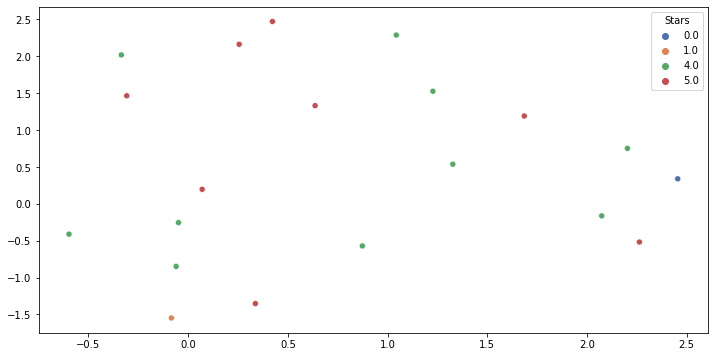

In [126]:
import random
random.seed = 7

ax = plot_hotel_embeddings(sim_hotels(random.choice(mymodel.wv.index_to_key),topn = 20),'review_rating')
ax.legend(title='Stars')
plt.show();

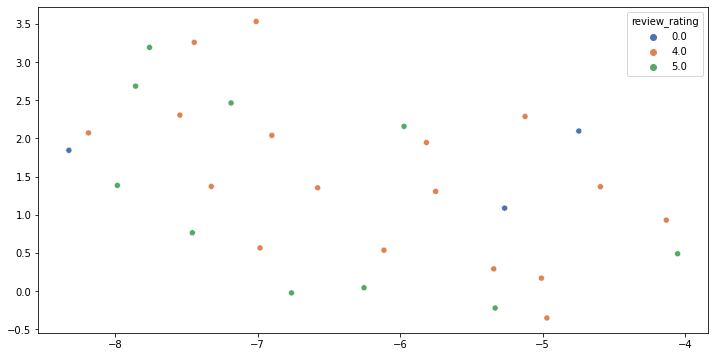

In [125]:
ax = plot_hotel_embeddings(df2.index[df2.location.isin([2.0])],'review_rating')
ax.legend(title='review_rating')
plt.show();

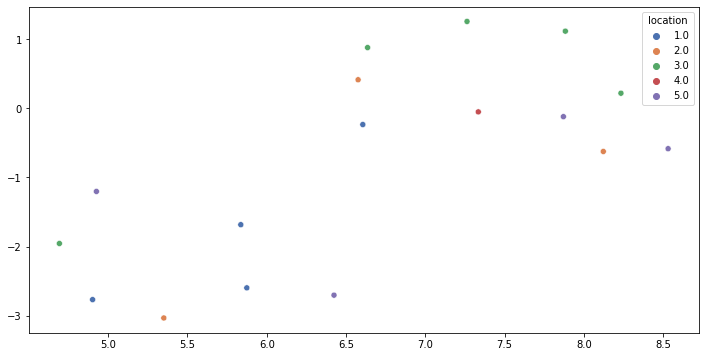

In [115]:
ax = plot_hotel_embeddings(df2[df2['location']==7.0].index,'price_bucket')
ax.legend(title='price bucket')
plt.show();

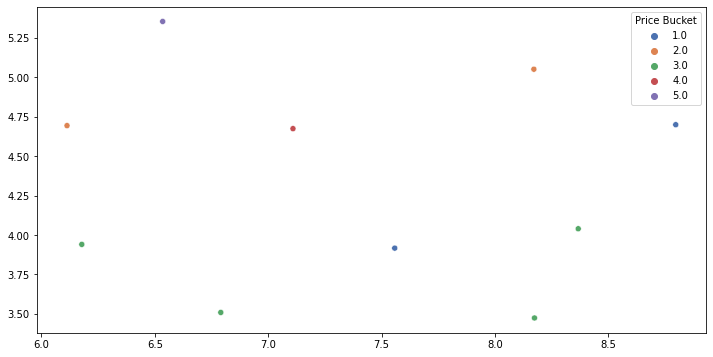

In [121]:
ax = plot_hotel_embeddings(sim_hotels(random.choice(mymodel.wv.index_to_key),topn = 10),'price_bucket')
ax.legend(title='Price Bucket')
plt.show();

In [130]:
ax = plot_hotel_embeddings(df2[~df2['review_rating']==0.0],'price_bucket')
ax.legend(title='Price Bucket')
plt.show();

TypeError: ufunc 'invert' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
df2.loc['2287779']

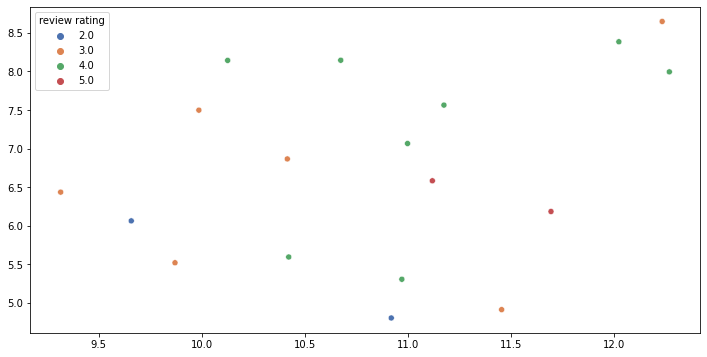

In [74]:
ax = plot_hotel_embeddings(sim_hotels(random.choice(mymodel.wv.index_to_key),topn =20),'star_rating')
ax.legend(title='review rating')
plt.show();

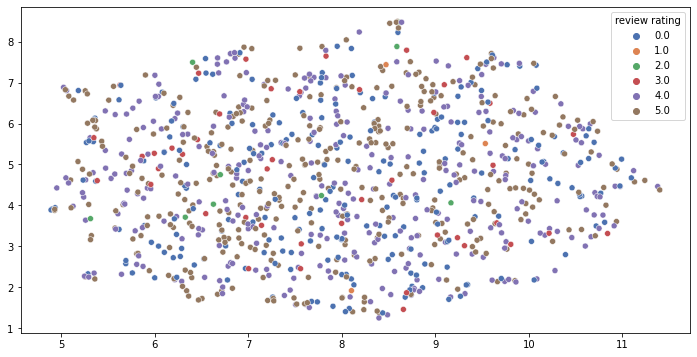

In [60]:
ax = plot_hotel_embeddings(df2.index[0:1000],'review_rating')
ax.legend(title='review rating')
plt.show();

In [ ]:
df2.columns[0]

In [ ]:
for c in df2.columns:
    print(c)
    for i in range(0,len(sim_hotels('1943423'))):
        print(df2.loc[sim_hotels('1943423')[i]][c])

In [ ]:
sim_hotels('1943423')[0]

In [ ]:
df2.index[1:1000]

In [ ]:
sim_hotels('1943423')

In [ ]:
import random
random.seed(7)
hotel_to_plot = random.choice()

In [ ]:
mymodel.wv

In [ ]:
df2.index[0]

In [ ]:
mymodel.wv['1943423']

In [ ]:
df2[df2['location']==50430.0]

In [ ]:
df2[df2['location']==2.0].index

In [57]:
mymodel.wv[mymodel.wv.isin(df2.index)]

AttributeError: 'KeyedVectors' object has no attribute 'isin'

In [129]:
df2[df2['review_rating'].isin([1.0,2.0,3.0,4.0,5.0])]

,location,star_rating,review_rating,price_bucket
prop_id,,,,
1980065,12.0,3.0,4.0,3.0
2419956,9.0,NaN,5.0,3.0
6314920,9397.0,3.0,5.0,1.0
4749000,1278.0,3.0,4.0,2.0
4284986,865.0,4.0,4.0,4.0
...,...,...,...,...
5484739,NaN,3.0,4.0,3.0
6242887,NaN,2.0,4.0,1.0
6561507,NaN,5.0,4.0,5.0
